In [3]:
#Importing necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving emails.csv to emails.csv


In [5]:
import pandas as pd
import io

data = pd.read_csv(io.BytesIO(uploaded['emails.csv']))

# Step 3: Display the DataFrame
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [6]:
data.shape

(5728, 2)

In [7]:
data.columns

Index(['text', 'spam'], dtype='object')

In [8]:
data['text'][0]

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [9]:
data['spam'].value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

**The code data.duplicated().sum() is used to identify and count the number of duplicate rows in a DataFrame. Here’s a brief explanation of how it works:**

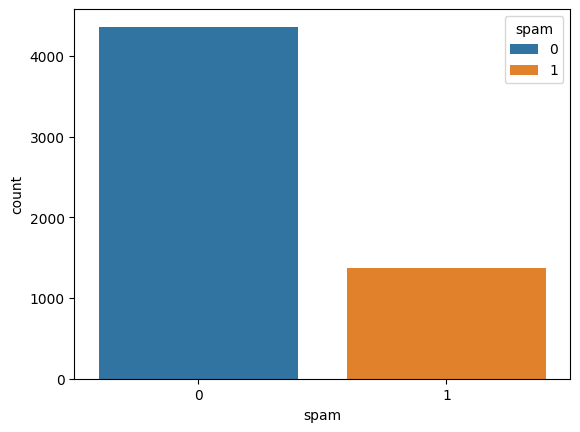

In [12]:
# Create and display the count plot with x-axis labeled as "spam"
sns.countplot(x=data['spam'].astype('category'),hue=data['spam'])

# Set the x-axis label
plt.xlabel("spam")

# Display the plot
plt.show()

In [13]:
data.duplicated().sum()

33

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data.duplicated().sum()

0

In [16]:
data.isnull().sum()


text    0
spam    0
dtype: int64

In [17]:
data.shape

(5695, 2)

In [18]:
5728 - 33

5695

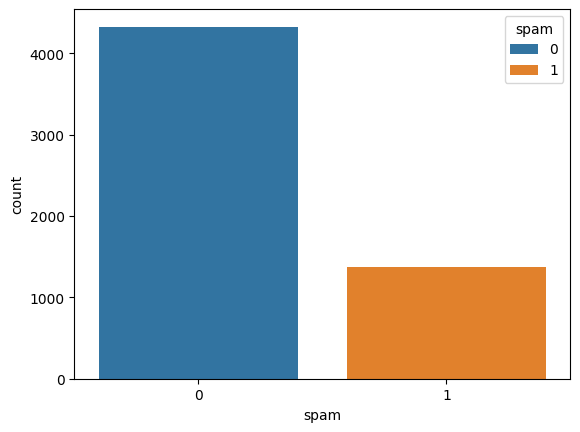

In [19]:
# Create and display the count plot with x-axis labeled as "spam"
sns.countplot(x=data['spam'].astype('category'),hue=data['spam'])

# Set the x-axis label
plt.xlabel("spam")

# Display the plot
plt.show()

In [20]:
data['spam'].value_counts()


spam
0    4327
1    1368
Name: count, dtype: int64

**Separate X and Y**

In [21]:
X=data['text'].values
y=data['spam'].values

**Train-Test Splits**

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [23]:
X_train.shape

(3986,)

In [24]:
X_test.shape

(1709,)

In [25]:
y_train.shape

(3986,)

In [26]:
y_test.shape

(1709,)

**Preprocessing**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
cv=CountVectorizer()

**Training by ML Algorithm**

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
nb=MultinomialNB()

In [30]:
pipe = make_pipeline(cv, nb)

In [31]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [32]:
y_pred = pipe.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9912229373902867

In [37]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)[0]

1